### Calculates the Duration from the metadata

In [73]:
import os
import csv
from datetime import datetime, timedelta
import itertools 

# Set the directory path
directory = '/Users/huriyeertay/Downloads/g-Degradation2D/CA-Ni-Thermal3D2DgloveBox-F10-deg'

# List to store the data
data = []

# Get the list of files sorted by name
files = sorted([f for f in os.listdir(directory) if f.lower().endswith(('.tiff', '.tif'))])

if not files:
    print(f"No TIFF files found in the directory: {directory}")
    print("Please check the directory path and ensure it contains .tiff or .tif files.")
    exit()

# Process each file
for file in files:
    file_path = os.path.join(directory, file)
    
    # Get frame number from filename
    try:
        frame_number = int(file.split('_')[-1].split('.')[0])  # More flexible frame number extraction
    except ValueError:
        print(f"Unable to extract frame number from filename: {file}")
        continue
    
    # Get file modification time
    mod_time = datetime.fromtimestamp(os.path.getmtime(file_path))
    
    # Format the modification time
    date_modified = mod_time.strftime('%Y:%m:%d %H:%M:%S')
    
    # Append data to list
    data.append([frame_number, date_modified, mod_time])

# Sort data by frame number and then by modification time
data.sort(key=lambda x: (x[0], x[2]))

# Remove duplicates keeping the entry with the earlier time
data = [next(group) for _, group in itertools.groupby(data, key=lambda x: x[0])]

# Calculate duration based on the first frame's time
start_time = data[0][2]
previous_duration = 0
for i, item in enumerate(data):
    duration = (item[2] - start_time).total_seconds()
    
    # Ensure duration is always increasing
    if duration < previous_duration:
        print(f"Warning: Inconsistent time for frame {item[0]}. Adjusting duration.")
        duration = previous_duration + 2  # Assume 2 second increment
    
    item[2] = duration
    previous_duration = duration

# Write data to CSV file on desktop
desktop = os.path.expanduser("~/Desktop")
csv_file = os.path.join(desktop, 'frame_data.csv')

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Frame Number', 'Date Modified', 'Duration (s)'])
    writer.writerows(data)

print(f"Data has been saved to {csv_file}")
print(f"Processed {len(data)} files.")

Data has been saved to /Users/huriyeertay/Desktop/frame_data.csv
Processed 1698 files.


### Files

In [74]:
files = ['AA-DoubleC-Humid-10TIM-PREandNOW',
         'AB-DoubleC-Humid-maxTIM-PREandNOWscan',
         'CA-Ni-Thermal3D2DgloveBox-F10-degscan',
         'CB-Ni-ALD-3D2DgloveBox-P10-deg2-seemsSEMscan',
         'CC-Ni-Thermal3D2DgloveBox-P10-deg',
         'CE-Ni-ALD-3D2DgloveBox-F10-degscan',
         'CF-Ni-Therm-SEM-3D2DgloveBox-F10-degSCAN',
         'DoubleC_X-Ray-Degradation_NOLaser_scan',
         'DoubleCat-Air-Tim-Post',
         'DoubleCat-Air-Tim-post-continue',
         'Doublecation_prehumidity',
         'EA-Ni-ALD-3D2DgloveBox-P10-HumdMAX_SCAN',
         'EPTA-TC-humid-TimMAX-PREandPOST',
         'ESA-TC-Humid-10TIM-PREandNOWscan',
         'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
         'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
         'GH-3D-NiO-ALD_plasma_50mM-FPEI-OK_00001',
         'GL-3D-NiO-ALD_plasma_50mM-FPEI-OK2-humid-FAILED-notemp',
         'GM-SnO2-3D-FPEI50mM-humid_CONTINUE-scan',
         'GM-SnO2-3D-FPEI50mM-humid-',
         'GM-SnO2-3D-FPEI50mM-humid-beginning',
         'MA-SnO2plasma-3D-FPEI50mM-_scan',
         'MF-NiOTherm-3D-PEI50mM-_SCAN',
         'MH-SnO2Plasma-3D-PEI50mM-continue_SCAN',
         'MI-NiOPlasma-3D-PEI50mM-_SCAN',
         'MN-NiOALDlasma-3D-PEI50mM-shortAnnealing-_SCAN',
         'MP-NiOALDPasma-3D-PEI50mM-shortAnnealing-_SCAN',
         'OCTA-TC-humid-TimMAX-PREandPOST',
         'QUADRIS-TC-Humid-10TIM-PREandNOW-optimized',
         'QUADRIS-TC-Humid-10TIM-PREandNOW-optimized-PASSINGtoMAX',
         'TC_X-Ray-Degradation_NOLaser_scan',
         'TripleCat-Air-Tim-PRE-']
        

### Calculates the duration and modifies the files

In [3]:
import pandas as pd

ending = '.txt'
datapath = '/Users/huriyeertay/Documents/IPVF/data/'
filepath = '/Users/huriyeertay/Documents/IPVF/Analysis/'
name = 'updated_frame_data.csv'
slash = '/'

files = [
         'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
         'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
         'GM-SnO2-3D-FPEI50mM-humid-beginning',
         'MA-SnO2plasma-3D-FPEI50mM-_scan',
         'MF-NiOTherm-3D-PEI50mM-_SCAN',
        
         ]
        

for fname in files:
    csv_path = datapath + fname + ending
    df = pd.read_csv(csv_path, delim_whitespace=True)
    
    # Data processing
    df['intensity'] = df['intensity'].astype(float)
    df['izero'] = df['izero'].astype(float)
    
    # Calculate intensity/izero
    df['intensity_over_izero'] = df['intensity'] / df['izero']

    # Normalize intensity_over_izero to the range [0, 1]
    max_value = df['intensity_over_izero'].max()
    df['intensity_izero_normalized'] = df['intensity_over_izero'] / max_value

    # Calculate duration_s
    df['duration_s'] = (df['imagenum']) * 2
    
    
    # Construct the CSV file path for saving
    csvname = filepath + fname + slash + name
    
    # Save the processed DataFrame to CSV
    df.to_csv(csvname, index=False)
    print(f'File saved as {csvname}')




File saved as /Users/huriyeertay/Documents/IPVF/Analysis/AA-DoubleC-Humid-10TIM-PREandNOW/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/AB-DoubleC-Humid-maxTIM-PREandNOWscan/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/CA-Ni-Thermal3D2DgloveBox-F10-degscan/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/CB-Ni-ALD-3D2DgloveBox-P10-deg2-seemsSEMscan/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/CC-Ni-Thermal3D2DgloveBox-P10-deg/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/CE-Ni-ALD-3D2DgloveBox-F10-degscan/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/CF-Ni-Therm-SEM-3D2DgloveBox-F10-degSCAN/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/DoubleC_X-Ray-Degradation_NOLaser_scan/updated_frame_data.csv
File saved as /Users/huriyeertay/Documents/IPVF/Analysis/

In [3]:
import pandas as pd


In [10]:
import pandas as pd
pd.read_csv(filepath + fname + slash + name)

,imagenum,twotheta,twotheta_cuka,dspacing,qvalue,intensity,frame_number,izero,date,time,intensity_over_izero,intensity_izero_normalized,duration_s
0,0,5.00,6.21396,14.21205,0.44210,1048.76,1,7373.0,15/06/2023,22:28:58,0.142243,0.144279,0
1,0,5.02,6.23883,14.15547,0.44387,1120.14,1,7373.0,15/06/2023,22:28:58,0.151925,0.154098,0
2,0,5.04,6.26369,14.09933,0.44564,1157.04,1,7373.0,15/06/2023,22:28:58,0.156929,0.159175,0
3,0,5.06,6.28856,14.04364,0.44740,1080.52,1,7373.0,15/06/2023,22:28:58,0.146551,0.148648,0
4,0,5.08,6.31342,13.98838,0.44917,1003.37,1,7373.0,15/06/2023,22:28:58,0.136087,0.138034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72495,57,29.90,37.39301,2.40302,2.61471,50.90,58,5986.0,15/06/2023,22:27:08,0.008503,0.008625,114
72496,57,29.92,37.41836,2.40145,2.61641,56.28,58,5986.0,15/06/2023,22:27:08,0.009402,0.009536,114
72497,57,29.94,37.44371,2.39988,2.61812,84.45,58,5986.0,15/06/2023,22:27:08,0.014108,0.014310,114
72498,57,29.96,37.46906,2.39832,2.61983,100.69,58,5986.0,15/06/2023,22:27:08,0.016821,0.017062,114


In [3]:
import pandas as pd
import icecream as ic

filepath = '/Users/huriyeertay/Documents/IPVF/Analysis/'
name = 'updated_frame_data.csv'
slash = '/'

# Example list of file names (replace with your actual list)
files = ['AA-DoubleC-Humid-10TIM-PREandNOW',
         'AB-DoubleC-Humid-maxTIM-PREandNOWscan',
         'CA-Ni-Thermal3D2DgloveBox-F10-degscan',
         'CB-Ni-ALD-3D2DgloveBox-P10-deg2-seemsSEMscan',
         'CC-Ni-Thermal3D2DgloveBox-P10-deg',
         'CE-Ni-ALD-3D2DgloveBox-F10-degscan',
         'CF-Ni-Therm-SEM-3D2DgloveBox-F10-degSCAN',
         'DoubleC_X-Ray-Degradation_NOLaser_scan',
         'DoubleCat-Air-Tim-Post',
         'DoubleCat-Air-Tim-post-continue',
         'Doublecation_prehumidity',
         'EA-Ni-ALD-3D2DgloveBox-P10-HumdMAX_SCAN',
         'EPTA-TC-humid-TimMAX-PREandPOST',
         'ESA-TC-Humid-10TIM-PREandNOWscan',
         'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
         'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
         'GH-3D-NiO-ALD_plasma_50mM-FPEI-OK_00001',
         'GL-3D-NiO-ALD_plasma_50mM-FPEI-OK2-humid-FAILED-notemp',
         'GM-SnO2-3D-FPEI50mM-humid_CONTINUE-scan',
         'GM-SnO2-3D-FPEI50mM-humid-',
         'GM-SnO2-3D-FPEI50mM-humid-beginning',
         'MA-SnO2plasma-3D-FPEI50mM-_scan',
         'MF-NiOTherm-3D-PEI50mM-_SCAN',
         'MH-SnO2Plasma-3D-PEI50mM-continue_SCAN',
         'MI-NiOPlasma-3D-PEI50mM-_SCAN',
         'MN-NiOALDlasma-3D-PEI50mM-shortAnnealing-_SCAN',
         'MP-NiOALDPasma-3D-PEI50mM-shortAnnealing-_SCAN',
         'OCTA-TC-humid-TimMAX-PREandPOST',
         'QUADRIS-TC-Humid-10TIM-PREandNOW-optimized',
         'QUADRIS-TC-Humid-10TIM-PREandNOW-optimized-PASSINGtoMAX',
         'TC_X-Ray-Degradation_NOLaser_scan',
         'TripleCat-Air-Tim-PRE-']


# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['fname', 'max_duration_s'])
results = []
for fname in files:
    
    csv_path = filepath + fname + slash + name
    print(f'Reading file: {csv_path}')
    
    try:
        df = pd.read_csv(csv_path)
        # Check if 'duration_s' column exists in the DataFrame
        if 'duration_s' in df.columns:
            # Calculate max duration_s
            max_duration_s = df['duration_s'].max()
            # Append fname and max_duration_s to results_df
            row = {'fname': fname, 'max_duration_s': max_duration_s}
            results.append(row)
        else:
            print(f'Warning: "duration_s" column not found in file {csv_path} Skipping...')
    
    except FileNotFoundError:
        print(f'Error: File {csv_path} not found. Skipping...')
    except Exception as e:
        print(f'Error processing file {csv_path}: {str(e)}')

# Print the results DataFrame
print(results)
results_df = pd.DataFrame(results)


Reading file: /Users/huriyeertay/Documents/IPVF/Analysis/AA-DoubleC-Humid-10TIM-PREandNOW/updated_frame_data.csv
Reading file: /Users/huriyeertay/Documents/IPVF/Analysis/AB-DoubleC-Humid-maxTIM-PREandNOWscan/updated_frame_data.csv
Reading file: /Users/huriyeertay/Documents/IPVF/Analysis/CA-Ni-Thermal3D2DgloveBox-F10-degscan/updated_frame_data.csv
Error: File /Users/huriyeertay/Documents/IPVF/Analysis/CA-Ni-Thermal3D2DgloveBox-F10-degscan/updated_frame_data.csv not found. Skipping...
Reading file: /Users/huriyeertay/Documents/IPVF/Analysis/CB-Ni-ALD-3D2DgloveBox-P10-deg2-seemsSEMscan/updated_frame_data.csv
Reading file: /Users/huriyeertay/Documents/IPVF/Analysis/CC-Ni-Thermal3D2DgloveBox-P10-deg/updated_frame_data.csv
Reading file: /Users/huriyeertay/Documents/IPVF/Analysis/CE-Ni-ALD-3D2DgloveBox-F10-degscan/updated_frame_data.csv
Error: File /Users/huriyeertay/Documents/IPVF/Analysis/CE-Ni-ALD-3D2DgloveBox-F10-degscan/updated_frame_data.csv not found. Skipping...
Reading file: /Users/h

In [16]:
results_df.to_csv("Duration.csv")

### Plots Heatmap

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df, figsize=(10, 8), save_plot=True, show_plot=True, save_path='heatmap.png'):
    print("Creating pivot table...")
    # Filter the DataFrame before pivoting
    filtered_data = df[df['qvalue'].between(0.75, 2.5) & (df['duration_s'] <= 200)]
    heatmap_data = filtered_data.pivot(index="qvalue", columns="duration_s", values="intensity_izero_normalized")
    
    print("Checking heatmap data:")
    print(heatmap_data.head())
    print(f"Shape of heatmap data: {heatmap_data.shape}")
    print(f"Columns (seconds) in heatmap data: {heatmap_data.columns.tolist()}")
    
    if heatmap_data.empty or heatmap_data.isnull().all().all():
        print("Warning: No valid data for heatmap.")
        return
    
    # Proceed with plotting, set a higher DPI for better image quality
    fig, ax = plt.subplots(figsize=figsize, dpi=150)
    sns.heatmap(heatmap_data, cmap="viridis", ax=ax, cbar_kws={'label': 'Intensity/Izero'}, annot=False)
    
    # Define explicit ticks for x-axis (seconds)
    max_seconds = min(200, heatmap_data.columns.max())
    x_ticks = np.linspace(0, max_seconds, 11)  # 11 ticks from 0 to max_seconds
    ax.set_xticks(np.interp(x_ticks, heatmap_data.columns, range(len(heatmap_data.columns))))
    ax.set_xticklabels([f"{x:.0f}" for x in x_ticks], rotation=0)
    
    # Define y-axis ticks and labels
    y_ticks = np.arange(0.8, 2.5, 0.2)
    ax.set_yticks(np.interp(y_ticks, heatmap_data.index, range(len(heatmap_data.index))))
    ax.set_yticklabels([f"{y:.1f}" for y in y_ticks])
    
    # Invert y-axis
    ax.invert_yaxis()
    
    print("Plotting heatmap...")
    plt.xlabel("Duration (s)", fontsize=12)
    plt.ylabel("$q$ (Å$^{-1}$)", fontsize=12)
    plt.title(f"{fname}", fontsize=14)
    
    # Save or show the plot
    if save_plot:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Heatmap saved as {save_path}")
    
    if show_plot:
        plt.show()

def analyze_file(csv_path):
    df = pd.read_csv(csv_path)
    
    # Count number of frames
    num_frames = len(df)
    
    # Count unique seconds
    unique_seconds = df['duration_s'].nunique()
    
    # Calculate time range
    min_time = df['duration_s'].min()
    max_time = df['duration_s'].max()
    
    return num_frames, unique_seconds, min_time, max_time



File: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
  Number of frames: 220000
  Number of unique seconds: 176
  Time range: 0.00s to 350.00s
  Unique duration_s values: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350]
Creating p

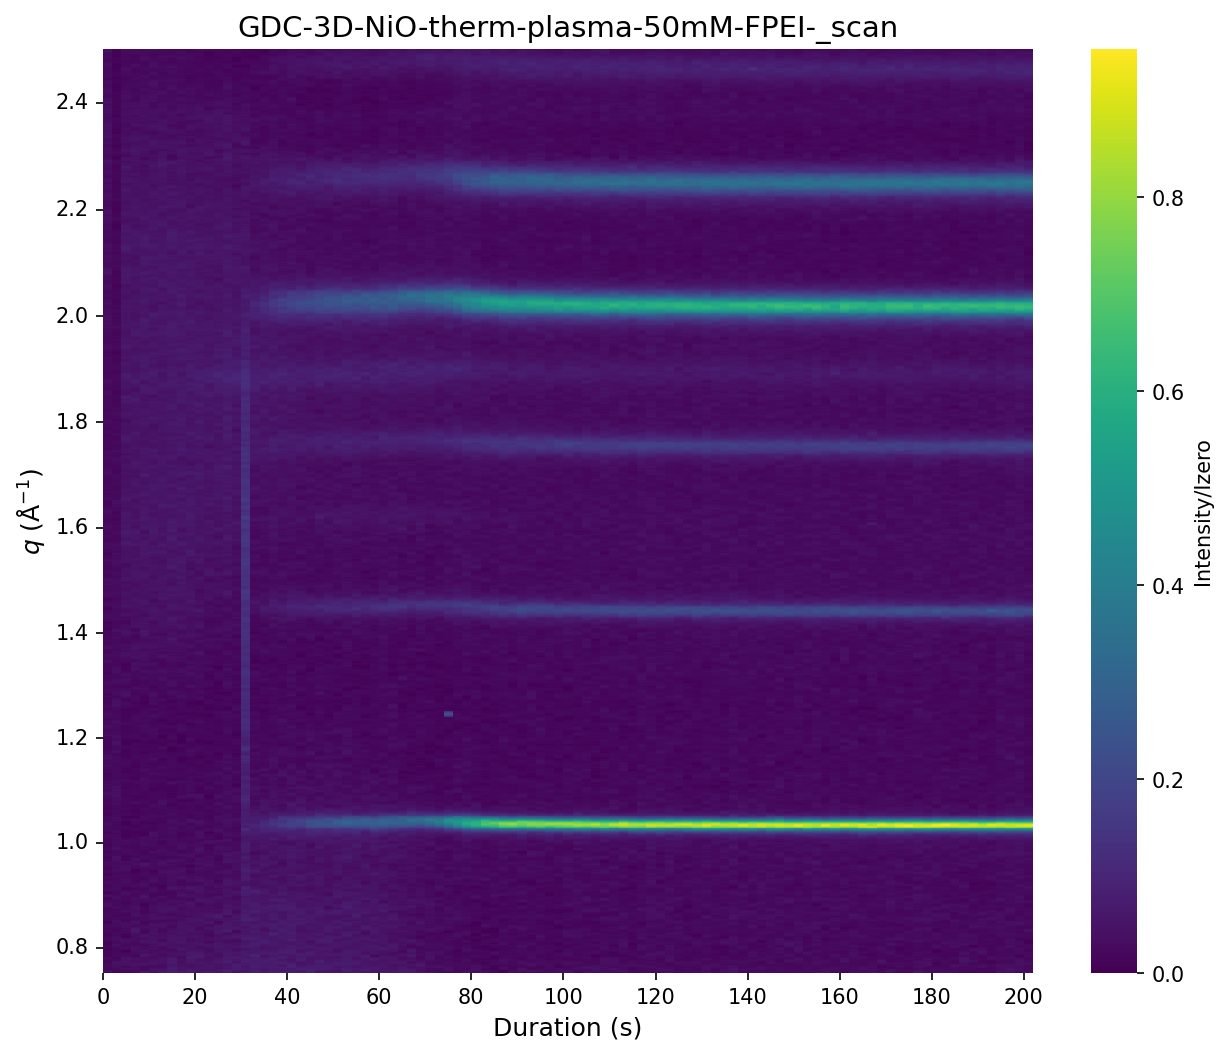

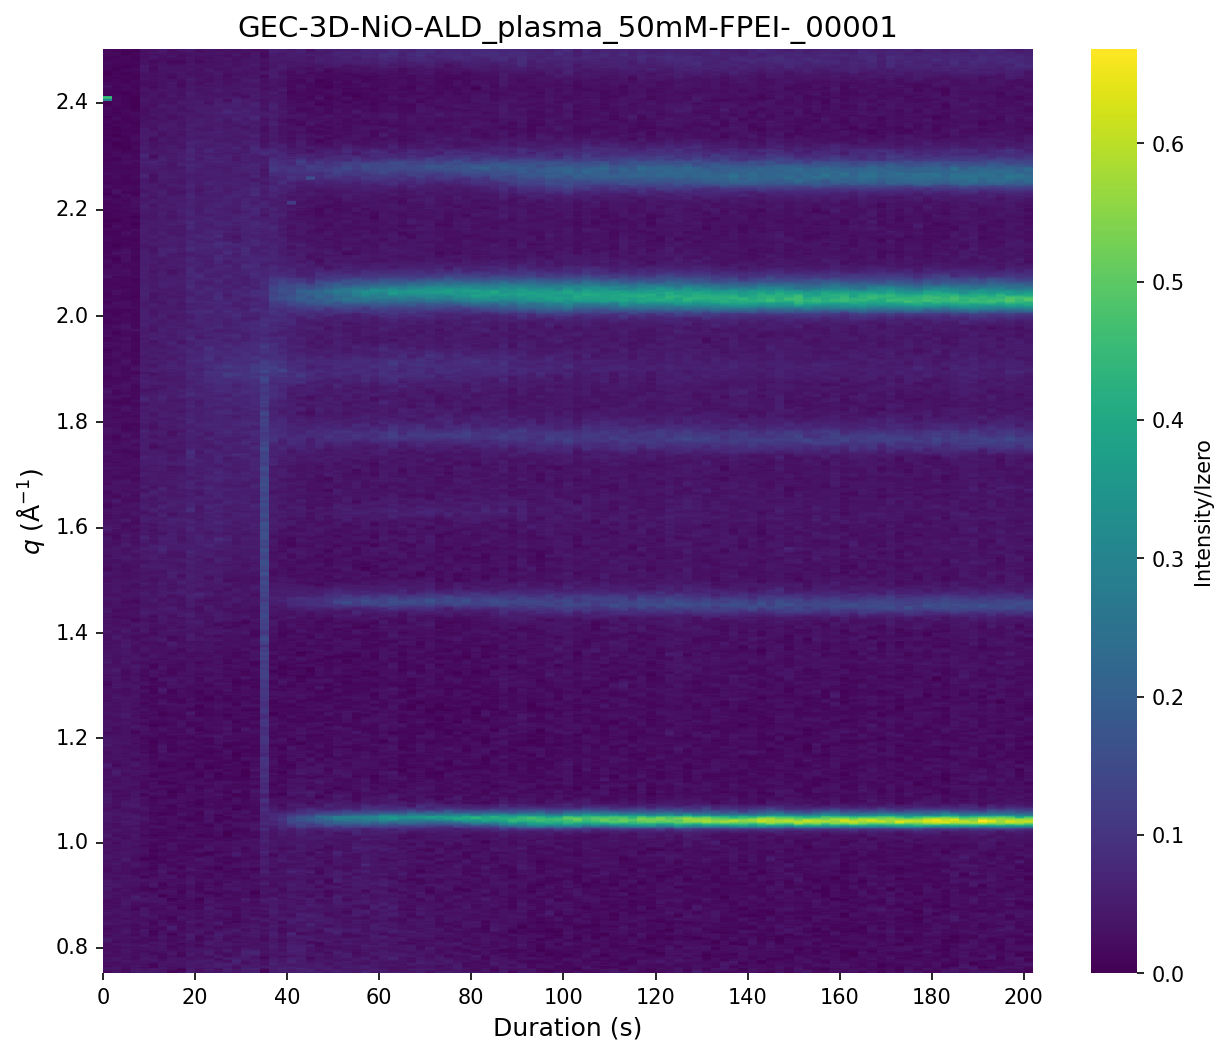

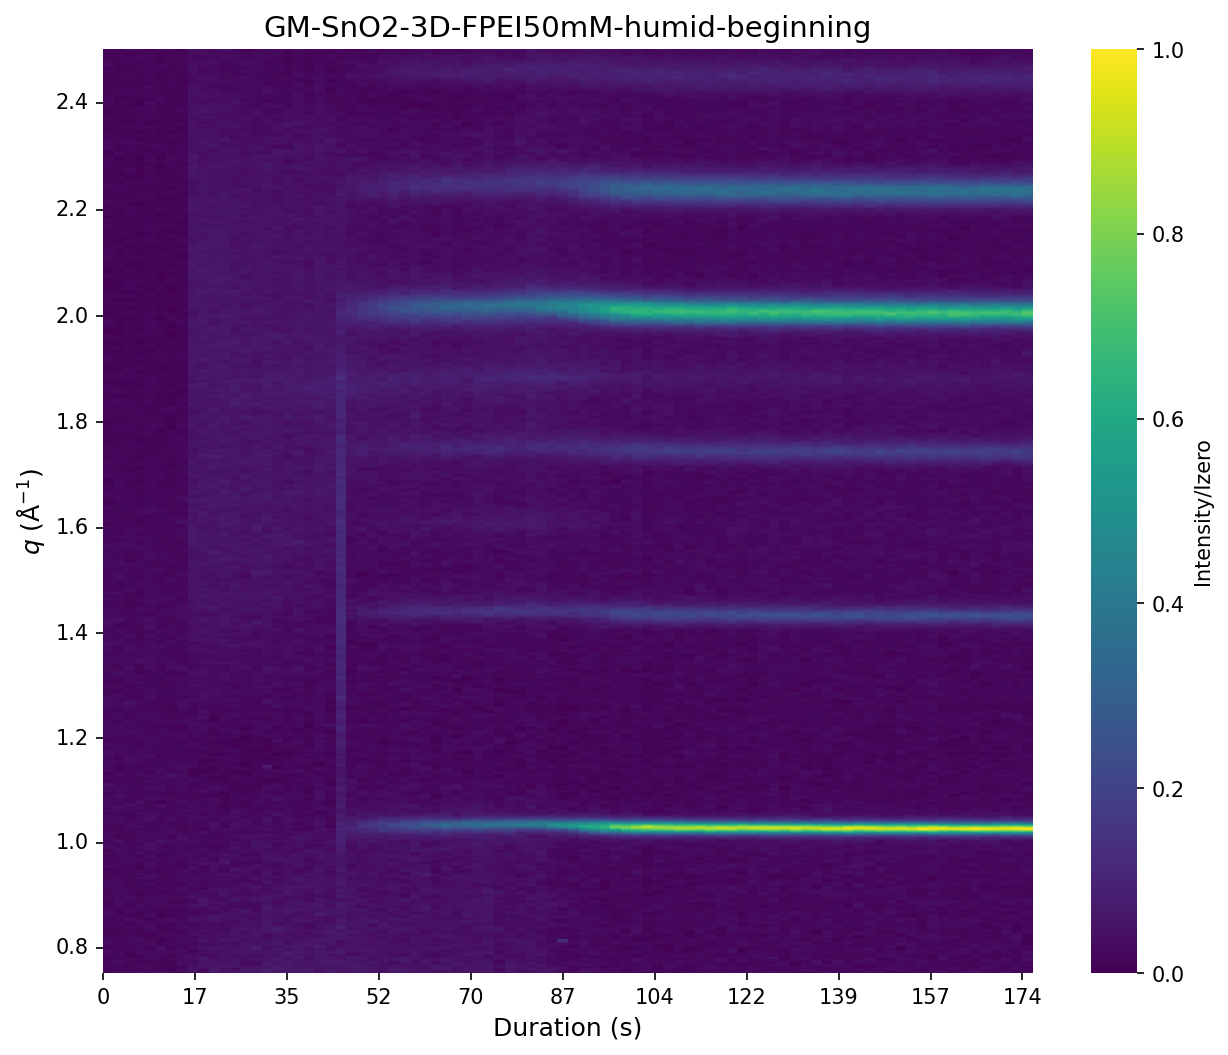

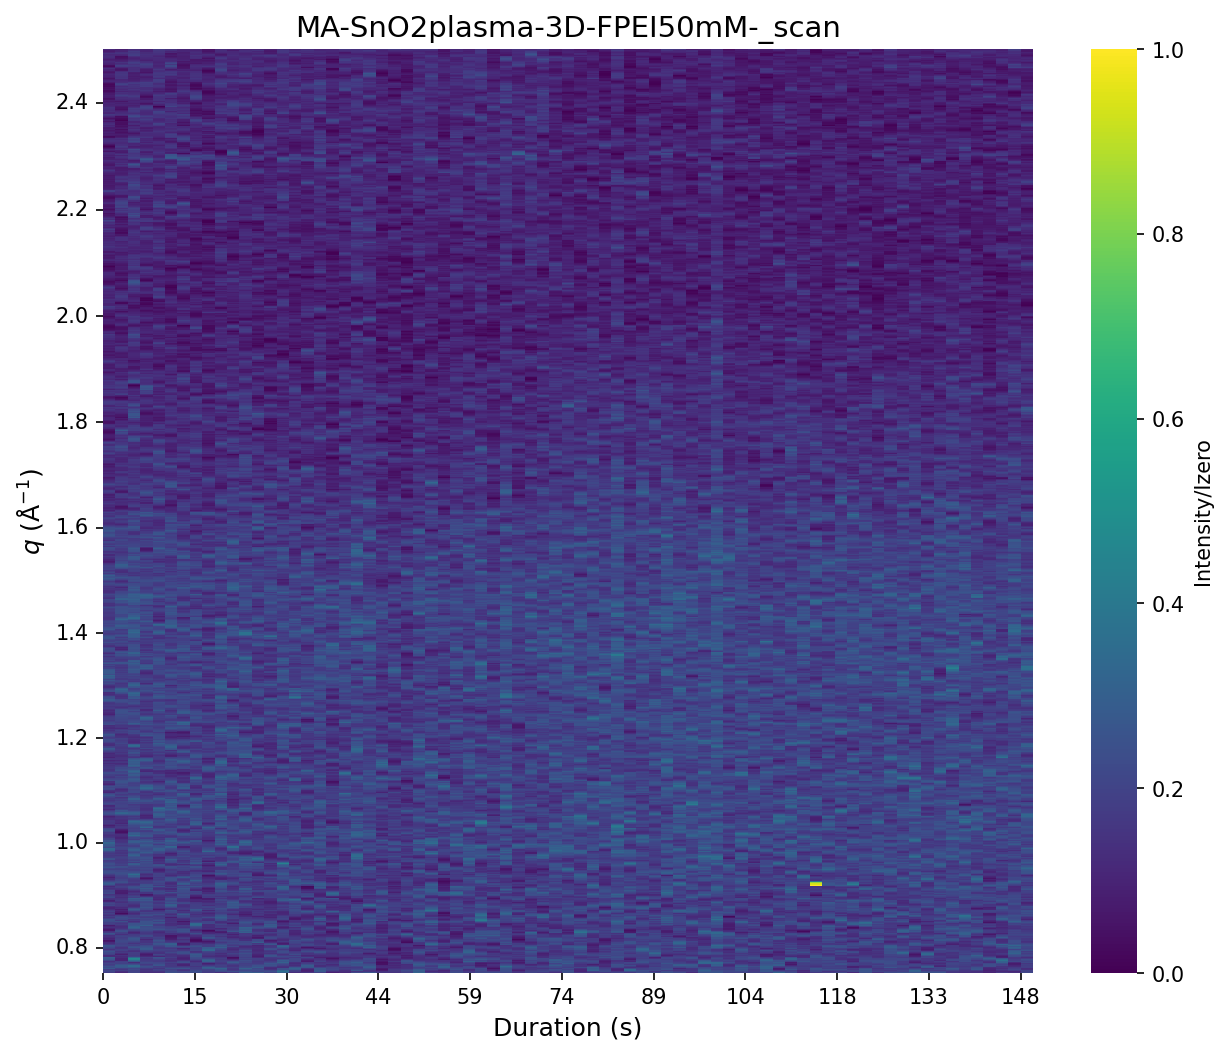

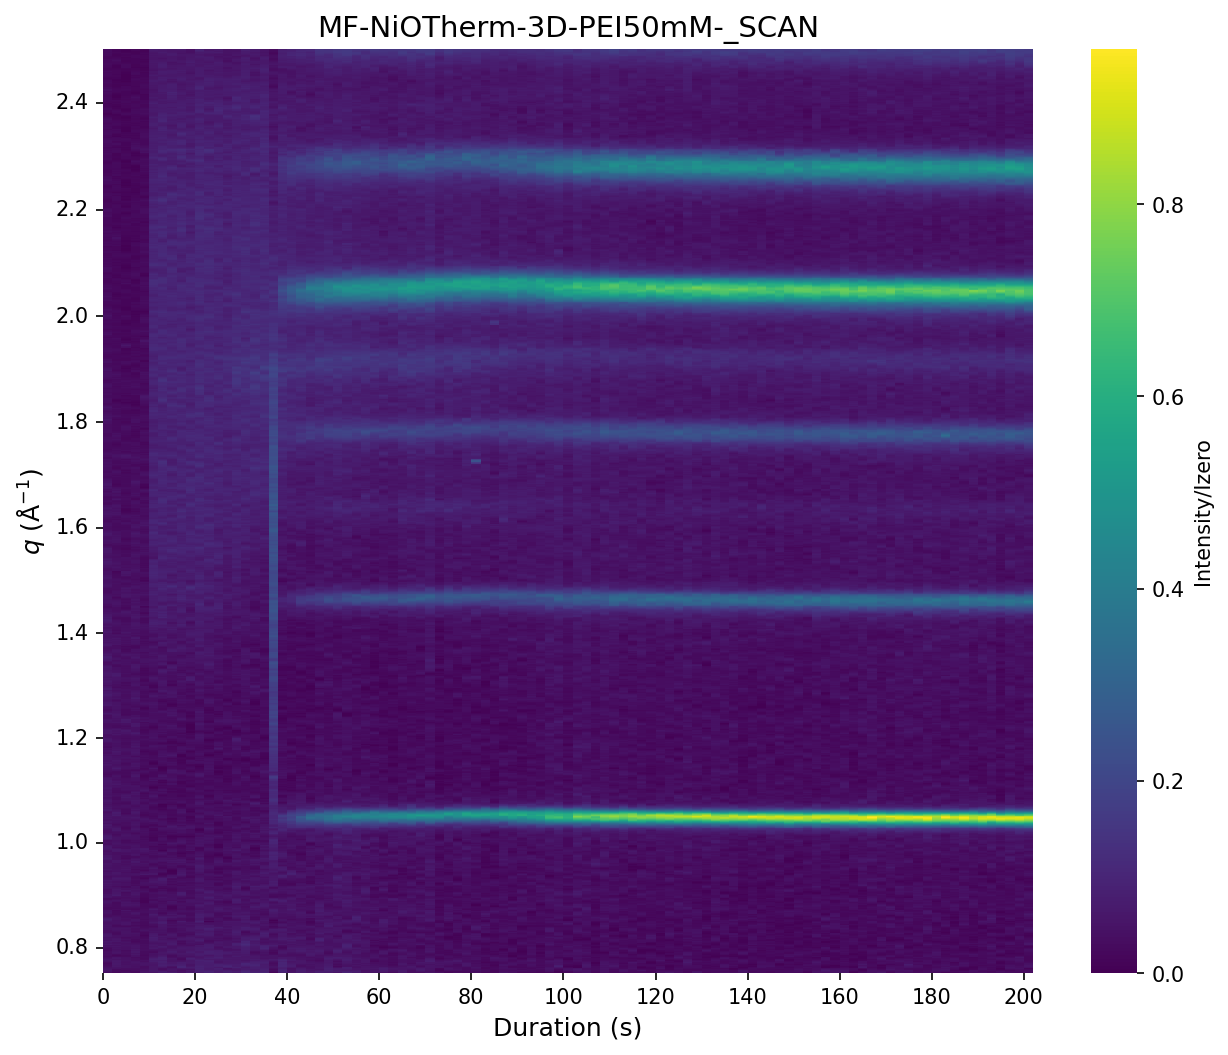

In [10]:
files = [
         'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
         'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
        
         'GM-SnO2-3D-FPEI50mM-humid-beginning',
         'MA-SnO2plasma-3D-FPEI50mM-_scan',
         'MF-NiOTherm-3D-PEI50mM-_SCAN',
        
         ]

fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'
name = 'updated_frame_data.csv'
slash = '/'

for fname in files:
    csv_path = os.path.join(fpath, fname, 'updated_frame_data.csv')
    if os.path.exists(csv_path):
        # Analyze the file
        df = pd.read_csv(csv_path)
        num_frames, unique_seconds, min_time, max_time = analyze_file(csv_path)
        
        print(f"File: {fname}")
        print(f"  Number of frames: {num_frames}")
        print(f"  Number of unique seconds: {unique_seconds}")
        print(f"  Time range: {min_time:.2f}s to {max_time:.2f}s")
        print(f"  Unique duration_s values: {sorted(df['duration_s'].unique())}")
        
        # Create the heatmap
        save_path = os.path.join(fpath, fname, 'heatmap.png')
        plot_heatmap(df, save_plot=True, show_plot=False, save_path=save_path)
        
        print("  Heatmap created.")
        print()
    else:
        print(f"File {csv_path} does not exist.")
        print()

### XRD Plot at 40s, 70s and 100s

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def load_data(csv_path):
    """Load the CSV file and return a DataFrame."""
    return pd.read_csv(csv_path)

def get_data_for_second(df, second):
    """Extract data for a specific second."""
    return df[df['duration_s'] == second]

def plot_intensity_vs_qvalue(data_dict, save_path, sample_name):
    """Create a single graph with multiple continuous lines for different time points, surrounded by a rectangle."""
    plt.figure(figsize=(10, 6))
    
    colors = ['b', 'g', 'r']  # Different color for each time point
    
    for (second, data), color in zip(data_dict.items(), colors):
        plt.plot(data['qvalue'], data['intensity_izero_normalized'], 
                 color=color, linestyle='-', linewidth=1,  # Thinner lines
                 label=f'Time: {second}s')
    
    plt.xlabel('q (Å$^{-1}$)', fontsize=12)
    plt.ylabel('Intensity/Izero', fontsize=12)
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    plt.xlim(0.5, 2.5)  # Set x-axis limit from 0.5 to 2.5
    plt.legend(loc='upper right', fontsize=12)
    
    # Ensure all spines are visible
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    
    # Add top and right axes ticks, but remove the perpendicular dash lines
    plt.gca().tick_params(top=True, right=True, direction='in', length=0)
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    
    # Set font size for tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

def process_file(csv_path, output_path, sample_name):
    """Process a single CSV file and create the plot."""
    df = load_data(csv_path)
    
    data_dict = {}
    for second in [40, 70, 100]:
        data = get_data_for_second(df, second)
        if not data.empty:
            data_dict[second] = data
        else:
            print(f"No data for second {second}")
    
    if data_dict:
        plot_intensity_vs_qvalue(data_dict, output_path, sample_name)
        print(f"Plot saved to {output_path}")
    else:
        print("No data available for plotting")


# Main execution
files = [
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GM-SnO2-3D-FPEI50mM-humid-beginning',
    'MA-SnO2plasma-3D-FPEI50mM-_scan',
    'MF-NiOTherm-3D-PEI50mM-_SCAN',
]
fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'

# Create a PDF to store all plots
pdf_path = os.path.join(fpath, 'all_intensity_vs_qvalue_plots.pdf')
with PdfPages(pdf_path) as pdf:
    for fname in files:
        csv_path = os.path.join(fpath, fname, 'updated_frame_data.csv')
        if os.path.exists(csv_path):
            output_path = os.path.join(fpath, fname, 'intensity_vs_qvalue_plot.png')
            print(f"Processing file: {fname}")
            process_file(csv_path, output_path, fname)
            
            # Add the plot to the PDF
            plt.figure(figsize=(8, 10))
            plt.imshow(plt.imread(output_path))
            plt.axis('off')
            pdf.savefig()
            plt.close()
            
            print()
        else:
            print(f"File {csv_path} does not exist.")
            print()

print(f"All plots have been saved to {pdf_path}")

Processing file: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
Plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan/intensity_vs_qvalue_plot.png

Processing file: GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001
Plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001/intensity_vs_qvalue_plot.png

Processing file: GM-SnO2-3D-FPEI50mM-humid-beginning
Plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/GM-SnO2-3D-FPEI50mM-humid-beginning/intensity_vs_qvalue_plot.png

Processing file: MA-SnO2plasma-3D-FPEI50mM-_scan
Plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/MA-SnO2plasma-3D-FPEI50mM-_scan/intensity_vs_qvalue_plot.png

Processing file: MF-NiOTherm-3D-PEI50mM-_SCAN
Plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/MF-NiOTherm-3D-PEI50mM-_SCAN/intensity_vs_qvalue_plot.png

All plots have been saved to /Users/huriyeertay/Documents/IPVF/Analysis/all_intensity_vs_qvalue_plots.pdf


### XRD Plot at 40s, 70s, 100s and 200s

Processing file: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
No data for second 500


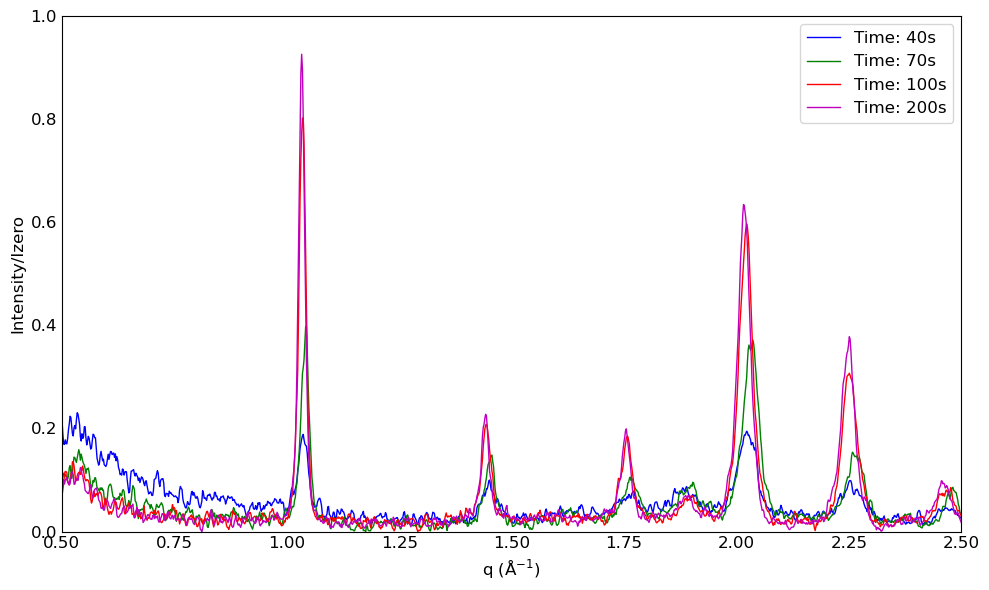

Extended plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan/intensity_vs_qvalue_plot_500extended.png

Processing file: GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001


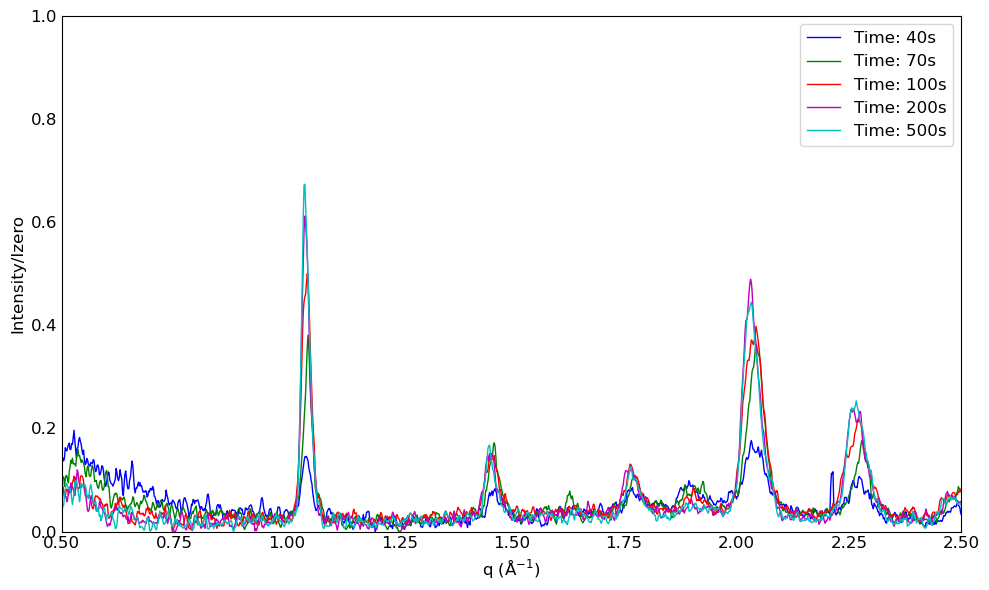

Extended plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001/intensity_vs_qvalue_plot_500extended.png

Processing file: GM-SnO2-3D-FPEI50mM-humid-beginning
No data for second 200
No data for second 500


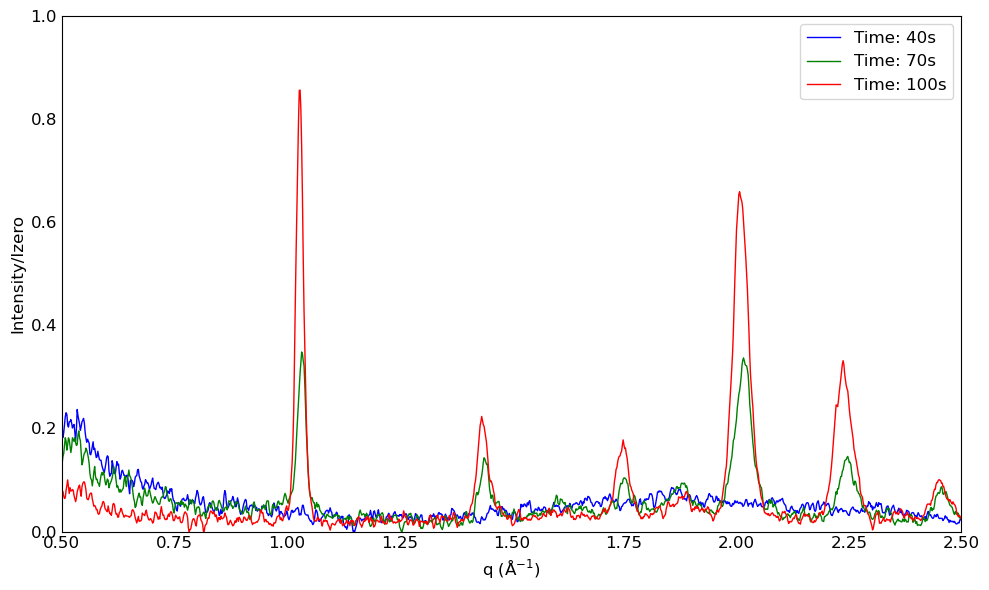

Extended plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/GM-SnO2-3D-FPEI50mM-humid-beginning/intensity_vs_qvalue_plot_500extended.png

Processing file: MA-SnO2plasma-3D-FPEI50mM-_scan
No data for second 200
No data for second 500


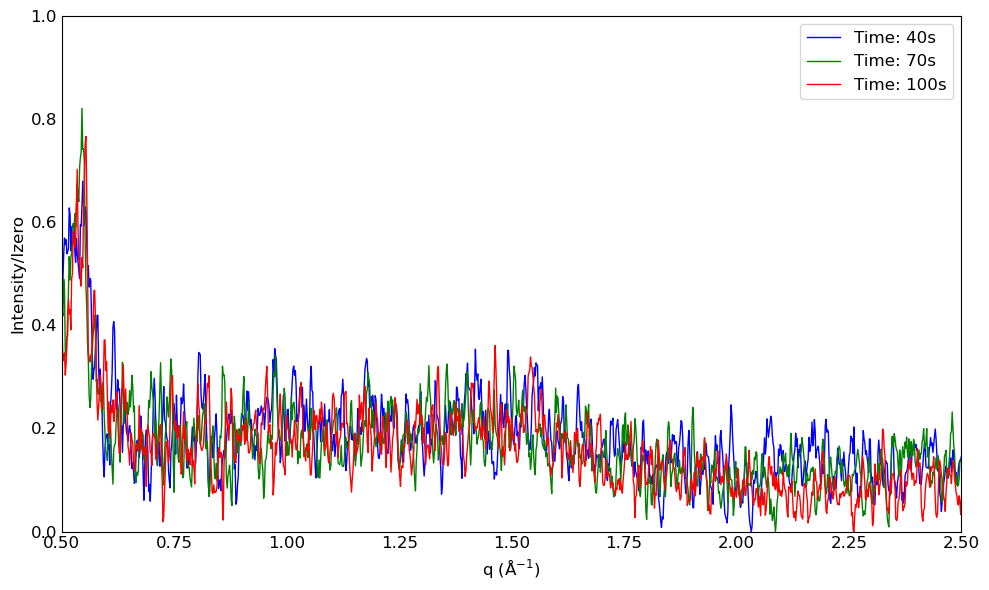

Extended plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/MA-SnO2plasma-3D-FPEI50mM-_scan/intensity_vs_qvalue_plot_500extended.png

Processing file: MF-NiOTherm-3D-PEI50mM-_SCAN
No data for second 500


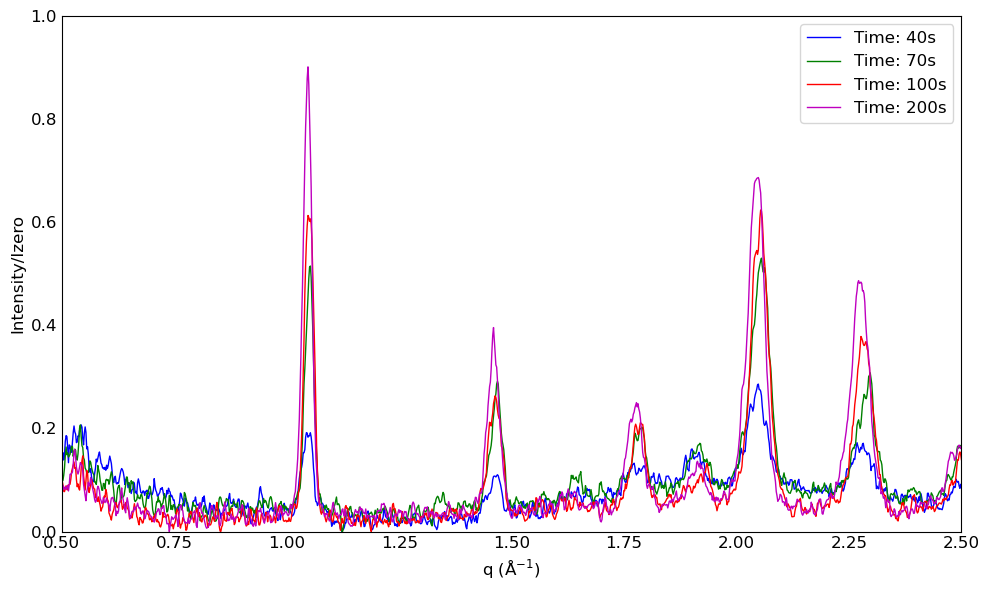

Extended plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/MF-NiOTherm-3D-PEI50mM-_SCAN/intensity_vs_qvalue_plot_500extended.png

All extended plots have been saved to /Users/huriyeertay/Documents/IPVF/Analysis/all_intensity_vs_qvalue_plots_extended.pdf


In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def load_data(csv_path):
    """Load the CSV file and return a DataFrame."""
    return pd.read_csv(csv_path)

def get_data_for_second(df, second):
    """Extract data for a specific second."""
    return df[df['duration_s'] == second]

def plot_intensity_vs_qvalue_extended(data_dict, save_path, sample_name):
    """Create a single graph with multiple continuous lines for different time points, including 200th and 500th seconds."""
    plt.figure(figsize=(10, 6))
    
    colors = ['b', 'g', 'r', 'm', 'c']  # Different color for each time point, added cyan for 500s
    
    for (second, data), color in zip(data_dict.items(), colors):
        plt.plot(data['qvalue'], data['intensity_izero_normalized'], 
                 color=color, linestyle='-', linewidth=1,
                 label=f'Time: {second}s')
    
    plt.xlabel('q (Å$^{-1}$)', fontsize=12)
    plt.ylabel('Intensity/Izero', fontsize=12)
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    plt.xlim(0.5, 2.5)  # Set x-axis limit from 0.5 to 2.5
    plt.legend(loc='upper right', fontsize=12)
    
    # Ensure all spines are visible
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    
    # Add top and right axes ticks, but remove the perpendicular dash lines
    plt.gca().tick_params(top=True, right=True, direction='in', length=0)
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    
    # Set font size for tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()  # This will display the plot
    plt.close()

def process_file_extended(csv_path, output_path, sample_name):
    """Process a single CSV file and create the extended plot including the 200th and 500th seconds."""
    df = load_data(csv_path)
    
    data_dict = {}
    for second in [40, 70, 100, 200, 500]:  # Added 200 and 500 seconds
        data = get_data_for_second(df, second)
        if not data.empty:
            data_dict[second] = data
        else:
            print(f"No data for second {second}")
    
    if data_dict:
        plot_intensity_vs_qvalue_extended(data_dict, output_path, sample_name)
        print(f"Extended plot saved to {output_path}")
    else:
        print("No data available for plotting")

# Main execution
files = [
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GM-SnO2-3D-FPEI50mM-humid-beginning',
    'MA-SnO2plasma-3D-FPEI50mM-_scan',
    'MF-NiOTherm-3D-PEI50mM-_SCAN',
]
fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'

# Create a PDF to store all plots
pdf_path = os.path.join(fpath, 'all_intensity_vs_qvalue_plots_extended.pdf')
with PdfPages(pdf_path) as pdf:
    for fname in files:
     
           csv_path = os.path.join(fpath, fname, 'updated_frame_data.csv')if os.path.exists(csv_path):
            output_path = os.path.join(fpath, fname, 'intensity_vs_qvalue_plot_500extended.png')
            print(f"Processing file: {fname}")
            process_file_extended(csv_path, output_path, fname)
            
            # Add the plot to the PDF
            plt.figure(figsize=(10, 6))
            plt.imshow(plt.imread(output_path))
            plt.axis('off')
            pdf.savefig()
            plt.close()
            
            print()
        else:
            print(f"File {csv_path} does not exist.")
            print()

print(f"All extended plots have been saved to {pdf_path}")




### PseudoVoigt Area Calculation


In [51]:
import pandas as pd

Processing file: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
Results for GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan saved to /Users/huriyeertay/Documents/IPVF/Analysis/GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan/pseudovoigt_areas_100-110.csv
Plot for GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan saved to /Users/huriyeertay/Documents/IPVF/Analysis/GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan/pseudovoigt_area_plot_100-110.png

Processing file: GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001
Results for GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001 saved to /Users/huriyeertay/Documents/IPVF/Analysis/GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001/pseudovoigt_areas_100-110.csv
Plot for GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001 saved to /Users/huriyeertay/Documents/IPVF/Analysis/GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001/pseudovoigt_area_plot_100-110.png

Processing file: GM-SnO2-3D-FPEI50mM-humid-beginning
Results for GM-SnO2-3D-FPEI50mM-humid-beginning saved to /Users/huriyeertay/Documents/IPVF/Analysis/GM-SnO2-3D-FPEI50mM-humid-beginning/ps

### Individual Pseudo-Voigt Plots

In [5]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
from scipy.special import voigt_profile
import os
import matplotlib.pyplot as plt

def pseudovoigt(x, center, amplitude, sigma, eta=0.7):
    """Calculate the Pseudo-Voigt profile for given parameters."""
    return amplitude * (eta * voigt_profile(x - center, sigma, sigma) + 
                        (1 - eta) * np.exp(-((x - center)**2) / (2 * sigma**2)))

def calculate_fwhm(sigma, eta):
    """Calculate the Full Width at Half Maximum for a Pseudo-Voigt profile."""
    fwhm_gaussian = 2 * np.sqrt(2 * np.log(2)) * sigma
    fwhm_lorentzian = 2 * sigma
    return eta * fwhm_lorentzian + (1 - eta) * fwhm_gaussian

def calculate_area(df, q_min, q_max, eta=0.7):
    """Calculate the area under the Pseudo-Voigt profile."""
    mask = (df['qvalue'] >= q_min) & (df['qvalue'] <= q_max)
    q_values = df.loc[mask, 'qvalue']
    intensities = df.loc[mask, 'intensity_izero_normalized']
    
    # Fit Pseudo-Voigt
    center = q_values.mean()
    amplitude = intensities.max()
    sigma = (q_max - q_min) / 4  # Estimate
    fitted_intensities = pseudovoigt(q_values, center, amplitude, sigma, eta)
    
    # Calculate area using Simpson's rule
    area = simps(fitted_intensities, q_values)
    fwhm = calculate_fwhm(sigma, eta)
    return area, fwhm

def process_file(csv_path, output_csv_path, output_png_path, fname):
    """Process a single GIWAXS data file."""
    df = pd.read_csv(csv_path)
    grouped = df.groupby('frame_number')
    results = []

    for frame, group in grouped:
        area, fwhm = calculate_area(group, q_min=1.0, q_max=1.1)
        duration = group['duration_s'].iloc[0]
        results.append({
            'area': area,
            'fwhm': fwhm,
            'duration_s': duration,
            'frame_number': frame
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv_path, index=False)
    print(f"Results for {fname} saved to {output_csv_path}")

    # Create and save plot
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(results_df['frame_number'], results_df['area'])
    plt.title(f'Pseudovoigt Area vs Frame Number - {fname}')
    plt.ylabel('Area')

    plt.subplot(2, 1, 2)
    plt.plot(results_df['frame_number'], results_df['fwhm'])
    plt.xlabel('Frame Number')
    plt.ylabel('FWHM')
    plt.tight_layout()
    plt.savefig(output_png_path)
    plt.close()
    print(f"Plot for {fname} saved to {output_png_path}")

# Main execution
files = [
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GM-SnO2-3D-FPEI50mM-humid-beginning',
    'MF-NiOTherm-3D-PEI50mM-_SCAN',
]
fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'

for fname in files:
    csv_path = os.path.join(fpath, fname, 'updated_frame_data.csv')
    if os.path.exists(csv_path):
        output_csv_path = os.path.join(fpath, fname, 'pseudovoigt_areas_100-110.csv')
        output_png_path = os.path.join(fpath, fname, 'pseudovoigt_area_plot_100-110.png')
        print(f"Processing file: {fname}")
        process_file(csv_path, output_csv_path, output_png_path, fname)
        print()
    else:
        print(f"File {csv_path} does not exist.")
        print()

print("All files have been processed.")


Processing file: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
Results for GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan saved to /Users/huriyeertay/Documents/IPVF/Analysis/GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan/pseudovoigt_areas_100-110.csv
Plot for GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan saved to /Users/huriyeertay/Documents/IPVF/Analysis/GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan/pseudovoigt_area_plot_100-110.png

Processing file: GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001
Results for GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001 saved to /Users/huriyeertay/Documents/IPVF/Analysis/GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001/pseudovoigt_areas_100-110.csv
Plot for GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001 saved to /Users/huriyeertay/Documents/IPVF/Analysis/GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001/pseudovoigt_area_plot_100-110.png

Processing file: GM-SnO2-3D-FPEI50mM-humid-beginning
Results for GM-SnO2-3D-FPEI50mM-humid-beginning saved to /Users/huriyeertay/Documents/IPVF/Analysis/GM-SnO2-3D-FPEI50mM-humid-beginning/ps

### Joint Pseudo-Voigt Areas Plot

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_and_process(file_path):
    df = pd.read_csv(file_path)
    df = df.sort_values('duration_s')
    df['smooth_area'] = df['area'].rolling(window=10, center=True).mean()
    df['smooth_duration'] = df['duration_s'].rolling(window=10, center=True).mean()
    df = df.dropna()
    df = df[df['smooth_duration'] <= 100]
    return df

#Removed for the time being
#' 'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
   #'MF-NiOTherm-3D-PEI50mM-_SCAN',
#'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan': 'NiOx (sol-gel + plasma)',
    #'MF-NiOTherm-3D-PEI50mM-_SCAN': 'NiOx (sol-gel)',
   #GM-SnO2-3D-FPEI50mM-humid-beginning',
# Main execution

files = [
 
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan'
    
]

legend_labels = {
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan': 'NiOx (sol-gel + plasma)',
    'MF-NiOTherm-3D-PEI50mM-_SCAN': 'NiOx (sol-gel)',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001': 'NiOx (ALD + plasma)',
    'GM-SnO2-3D-FPEI50mM-humid-beginning': r'SnO$_2$',
}

fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 18})

for fname in files:
    csv_path = os.path.join(fpath, fname, 'pseudovoigt_areas_100-110.csv')
    if os.path.exists(csv_path):
        print(f"Processing file: {fname}")
        df = read_and_process(csv_path)
        plt.plot(df['smooth_duration'], df['smooth_area'], linewidth=2, label=legend_labels[fname])
    else:
        print(f"File {csv_path} does not exist.")

plt.title('Pseudovoigt Area vs Duration', fontsize=18)
plt.xlabel('Duration (s)', fontsize=18)
plt.ylabel('Pseudovoigt Area', fontsize=18)
plt.xlim(10, 100)

plt.legend(loc='best', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

output_path = os.path.join(fpath, 'Plasma.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Combined plot saved to {output_path}")

Processing file: GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001
Processing file: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
Combined plot saved to /Users/huriyeertay/Documents/IPVF/Analysis/Plasma.png


### Stacked Plot

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File information
files = [
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GM-SnO2-3D-FPEI50mM-humid-beginning',
    'MF-NiOTherm-3D-PEI50mM-_SCAN',
]
legend_labels = {
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan': 'NiOx (thermal + plasma)',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001': 'NiOx (ALD + plasma)',
    'GM-SnO2-3D-FPEI50mM-humid-beginning': r'SnO$_2$',
    'MF-NiOTherm-3D-PEI50mM-_SCAN': 'NiOx (thermal)',
}
fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'

# Set font sizes
plt.rcParams.update({'font.size': 16})

# Create the plot
plt.figure(figsize=(12, 8))

# Updated color palette
colors = {
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan': 'blue',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001': 'orange',
    'GM-SnO2-3D-FPEI50mM-humid-beginning': 'green',
    'MF-NiOTherm-3D-PEI50mM-_SCAN': 'red',
}

# Process each file
for file in files:
    # Construct full file path
    full_path = os.path.join(fpath, file, 'updated_frame_data.csv')
    
    if os.path.exists(full_path):
        print(f"Processing file: {file}")
        
        # Read the CSV file
        df = pd.read_csv(full_path)
        
        # Filter the data for the 100th second
        df_100s = df[df['duration_s'] == 150]
        
        # Sort by qvalue to ensure line is drawn correctly
        df_100s = df_100s.sort_values('qvalue')
        
        # Plot the data with reduced line thickness and updated color
        plt.plot(df_100s['qvalue'], df_100s['intensity_izero_normalized'], 
                 label=legend_labels[file], color=colors[file], linewidth=1)
    else:
        print(f"File {full_path} does not exist.")

# Set labels and title
plt.xlabel('Q Value', fontsize=16)
plt.ylabel('Normalized Intensity/Izero', fontsize=16)
plt.title('Normalized Intensity/Izero vs Q Value at 150 seconds', fontsize=16)

# Add legend inside the graph
plt.legend(loc='best', fontsize=16)

# Remove the grid
plt.grid(False)

# Set tick label font sizes
plt.tick_params(axis='both', which='major', labelsize=16)

# Adjust layout
plt.tight_layout()

# Save the plot as PNG
output_path = os.path.join(fpath, 'psk_crystallisation_150s.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"Plot has been saved to {output_path}")

# Close the plot to free up memory
plt.close()

Processing file: GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan
Processing file: GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001
Processing file: GM-SnO2-3D-FPEI50mM-humid-beginning
Processing file: MF-NiOTherm-3D-PEI50mM-_SCAN
Plot has been saved to /Users/huriyeertay/Documents/IPVF/Analysis/psk_crystallisation_150s.png


### XRD Waterfall Plot

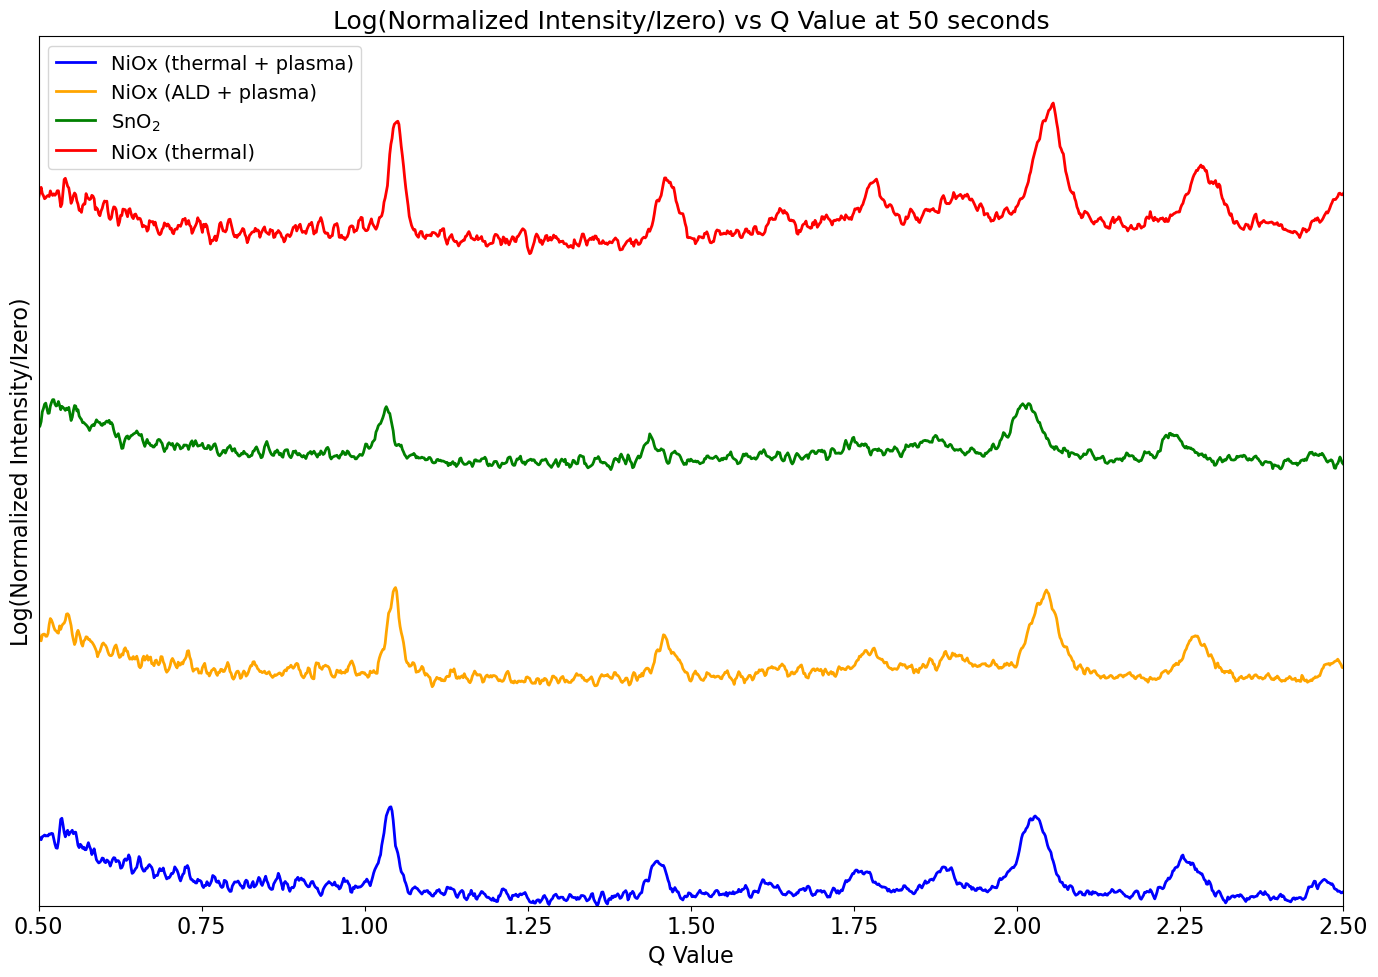

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

files = [
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GM-SnO2-3D-FPEI50mM-humid-beginning',
    'MF-NiOTherm-3D-PEI50mM-_SCAN',
]
legend_labels = {
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan': 'NiOx (thermal + plasma)',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001': 'NiOx (ALD + plasma)',
    'GM-SnO2-3D-FPEI50mM-humid-beginning': r'SnO$_2$',
    'MF-NiOTherm-3D-PEI50mM-_SCAN': 'NiOx (thermal)',
}
colors = {
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan': 'blue',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001': 'orange',
    'GM-SnO2-3D-FPEI50mM-humid-beginning': 'green',
    'MF-NiOTherm-3D-PEI50mM-_SCAN': 'red',
}
fpath = '/Users/huriyeertay/Documents/IPVF/Analysis/'

offset = 1.0  # Adjust this value to change the spacing between lines

plt.figure(figsize=(14, 10))  # Increased figure size

# Set global font size
plt.rcParams.update({'font.size': 14})

max_intensity = 0

# First pass to find the maximum intensity across all datasets
for file in files:
    full_path = os.path.join(fpath, file, 'updated_frame_data.csv')
    
    if os.path.exists(full_path):
        df = pd.read_csv(full_path)
        df_100s = df[df['duration_s'] == 50].sort_values('qvalue')
        max_intensity = max(max_intensity, df_100s['intensity_izero_normalized'].max())
    else:
        print(f"File {full_path} does not exist.")

# Second pass to plot the data
for i, file in enumerate(files):
    full_path = os.path.join(fpath, file, 'updated_frame_data.csv')
    
    if os.path.exists(full_path):
        df = pd.read_csv(full_path)
        df_100s = df[df['duration_s'] == 50].sort_values('qvalue')
        
        # Apply logarithmic transformation and normalization
        y = np.log1p(df_100s['intensity_izero_normalized'] / max_intensity) + i * offset
        plt.plot(df_100s['qvalue'], y, color=colors[file], linewidth=2, label=legend_labels[file])
    else:
        print(f"File {full_path} does not exist.")

plt.xlabel('Q Value', fontsize=16)
plt.ylabel('Log(Normalized Intensity/Izero)', fontsize=16)
plt.title('Log(Normalized Intensity/Izero) vs Q Value at 50 seconds', fontsize=18)
plt.xlim(0.5, 2.5)  # Adjust these limits based on your data
plt.ylim(0, len(files) * offset)  # Adjust the upper limit based on the number of files and offset
plt.yticks([])  # Remove y-axis ticks
plt.legend(loc= 'best')
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.savefig(os.path.join(fpath, 'stacked_plot_50s_log.png'), dpi=300, bbox_inches='tight')
plt.show()

/Users/huriyeertay/miniconda3/envs/lillies/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


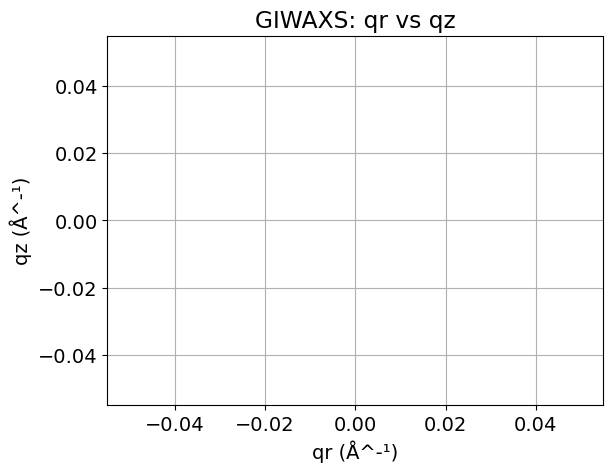

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

files = [
    'GDC-3D-NiO-therm-plasma-50mM-FPEI-_scan',
    'GEC-3D-NiO-ALD_plasma_50mM-FPEI-_00001',
    'GM-SnO2-3D-FPEI50mM-humid-beginning',
    'MF-NiOTherm-3D-PEI50mM-_SCAN',
]

# Convert degrees to radians for calculation
df['twotheta_rad'] = np.deg2rad(df['twotheta'])

# Constants
lambda_xray = 1.54184  # Cu K-alpha wavelength in Angstroms
k = 0.9  # Shape factor, often taken as 0.9
